Flory's Exponent is then v = 0.3993796531685862


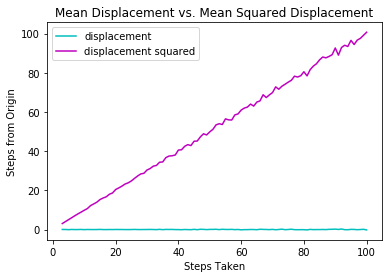

In [86]:
#1D Random Walk
#Liam Plybon 2019

import math
import statistics
import random
import numpy as np
import matplotlib.pyplot as plt
 
nstart = 3
nend = 100
trials = 10000
A = math.sqrt(2)

walks = []
r = []
r2 = []
step = []
v = []

steps = nstart
for i in range(nend - nstart + 1):
    for j in range(trials):
        position = 0
        for k in range(steps):
            o = random.random()
            if o > .5:
                position = position + 1
            if o < .5:
                position = position - 1
        walks.append(position)
    r.append(statistics.mean(walks))
    r2.append(statistics.mean([l**2 for l in walks]))
    step.append(i + nstart)
    walks = []
    steps = steps + 1

stdev = [math.sqrt(x) for x in r2]                             #Calculates the standard deviation

for sig in stdev:
    index = stdev.index(sig) + nstart
    v.append(math.log(sig/A, index))
V = statistics.mean(v)

plt.plot(step,r, 'c', label = "displacement")
plt.plot(step,r2, 'm', label = "displacement squared")
plt.title("Mean Displacement vs. Mean Squared Displacement")
plt.xlabel("Steps Taken")
plt.ylabel("Steps from Origin")
plt.legend()
#plt.plot(step,stdev, 'c')       #plots standard deviation, a more interesting thing to track.
plt.show()

Flory's Exponent is then v = 0.298066834255913


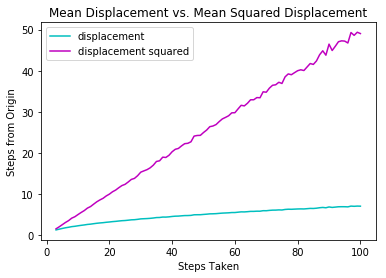

In [20]:
#2D Random Walk
#Liam Plybon 2019

import math
import statistics
import random
import numpy as np
import matplotlib.pyplot as plt
 
nstart = 3
nend = 100
trials = 10000
A = math.sqrt(2)

xwalks = []
ywalks = []
r = []
r2 = []
step = []
v = []

steps = nstart
for i in range(nend - nstart + 1):
    for j in range(trials):
        x = 0
        y = 0
        for k in range(steps):
            theta = random.random() * 2 * math.pi
            x = x + math.cos(theta)
            y = y + math.sin(theta)
        xwalks.append(x)
        ywalks.append(y)
    r.append(math.sqrt(statistics.mean([l**2 for l in xwalks] + [m**2 for m in ywalks])))
    r2.append(statistics.mean([l**2 for l in xwalks] + [m**2 for m in ywalks]))
    step.append(i + nstart)
    xwalks = []
    ywalks = []
    steps = steps + 1
stdev = [math.sqrt(x) for x in r2]                             #Calculates the standard deviation

for sig in r:
    index = r.index(sig) + nstart
    v.append(math.log(sig/A, index))
V = statistics.mean(v)

plt.plot(step,r, 'c', label = "displacement")
plt.plot(step,r2, 'm', label = "displacement squared")
plt.title("Mean Displacement vs. Mean Squared Displacement")
plt.xlabel("Steps Taken")
plt.ylabel("Steps from Origin")
plt.legend()
#plt.plot(step,stdev, 'c')       #plots standard deviation, a more interesting thing to track.
plt.show()

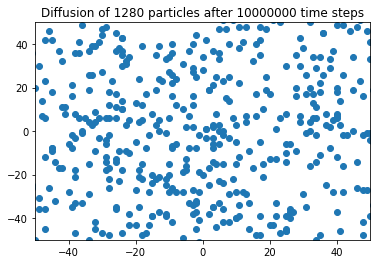

(-16.0, -28.0)
7.139452762338868


In [10]:
#Diffusion Simulation, 2D Box with Permeable Walls. Calculates the System Entropy.
#Liam Plybon, 2019

import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
import random

N = 20                          #Number of particles occupying a grid square
L = 8                           #Length of square side
steps = 10000000                     #Number of time steps
Axis = 100

lim = Axis / 2

offset = L / 2

x = []
y = []

for n in range(N):
    for i in range(L):
        for j in range(L):
            x.append(i-offset)
            y.append(j-offset)
            
for i in range(steps):
    h = random.random()
    q = random.random()
    p = random.randrange(1, len(x), 1)
    if h > .5:
        if q > .5:
            x[p-1] = x[p-1] + 1
        if q < .5:
            x[p-1] = x[p-1] - 1
    if h < .5:
        if q > .5:
            y[p-1] = y[p-1] + 1
        if q < .5:
            y[p-1] = y[p-1] - 1
    #print(x+y)

    
plt.scatter(x, y)
plt.title("Diffusion of " + str(N*L*L) + " particles after " + str(steps) + " time steps")
plt.xlim(-1 * lim, lim)
plt.ylim(-1 * lim, lim)
plt.show()

#Calculating entropy
coords = list(zip(x, y))                   #zips up x and y into a single coordinate
counter = collections.Counter(coords)       #uses a counter to count unique coordinates
a = counter.values()                        #this array contains the number of times a coordinate is found
a = [x / ( N * L * L) for x in a]  #this divides the number of found coordinates by the total particles
s = []
for i in a:
    s.append(i * math.log(i))           
S = -1 * sum(s)
print(S)

6.15388654284942
6.522095936467206
6.707478034772853
6.778277779735859
6.849732862105427
6.872265365995241
6.9018622210147385
6.924573207093827
6.980203172324716
6.977771620140477
6.996326662491421
7.0221975348847465
7.01827415261856
7.043184129419933
7.038708639174107
7.031801596744042
7.0380343843167985
7.036685874602182
7.064314044322442
7.068502893833617
7.071752021242493
7.062004639015867
7.0591642992193115
7.063087681485495
7.067154384119002
7.057407001892379
7.0628222142405015
7.0706689787728685
7.073509318569425
7.060247341688936
7.084483063632996
7.070260191160552
7.065928021282052
7.075409936263683
7.088140978654187
7.054832129340813
7.074470214161382
7.068911681445933
7.088815233511497
7.077167233590618
7.062678893873178
7.059164299219314
7.070138044282884
7.078659063672559
7.060247341688935
7.06349646909781
7.073652638936749
7.067828638976309
7.052257256789248
7.066071341649377
7.07216080885481
7.080150893754498
7.055915171810436
7.062004639015869
7.082725766306065
7.079067

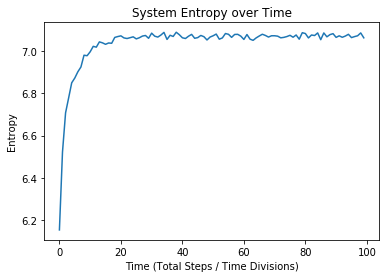

In [23]:
#Diffusion Simulation, 2D Box with Non-Permeable Walls. Calculates the System Entropy and plots over time.
#Liam Plybon, 2019

import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
import random
import collections

N = 20                          #Number of particles occupying a grid square
L = 8                           #Length of square side
steps = 10000000                     #Number of time steps
Axis = 100
times = 100
particleplots = 0

lim = Axis / 2

offset = L / 2

x = []
y = []
entropy = []


#Initializes a cube of particles.
for n in range(N):
    for i in range(L):
        for j in range(L):
            x.append(i-offset)
            y.append(j-offset)
            
#Runs the motion of the particles.
for t in range(times):
    for i in range(int(steps / times)):
        h = random.random()
        q = random.random()
        p = random.randrange(1, len(x), 1)
        if h > .5:
            if q > .5:
                x[p-1] = x[p-1] + 1
                if x[p-1] > lim:
                    x[p-1] = x[p-1] - 1
            if q < .5:
                x[p-1] = x[p-1] - 1
                if x[p-1] < -1 * lim:
                    x[p-1] = x[p-1] + 1
        if h < .5:
            if q > .5:
                y[p-1] = y[p-1] + 1
                if y[p-1] > lim:
                    y[p-1] = y[p-1] - 1
            if q < .5:
                y[p-1] = y[p-1] - 1
                if y[p-1] < -1 * lim:
                    y[p-1] = y[p-1] + 1


    #Plots the particles after they move about.
    if particleplots > 1:
        plt.scatter(x, y)
        plt.title("Diffusion of " + str(N*L*L) + " particles after " + str(steps) + " time steps")
        plt.xlim(-1 * lim, lim)
        plt.ylim(-1 * lim, lim)
        plt.show()

    #Calculating total entropy.
    coords = list(zip(x, y))                   #zips up x and y into a single coordinate
    counter = collections.Counter(coords)       #uses a counter to count unique coordinates
    a = counter.values()                        #this array contains the number of times a coordinate is found
    a = [x / ( N * L * L) for x in a]  #this divides the number of found coordinates by the total particles
    s = []
    for i in a:
        s.append(i * math.log(i))           
    S = -1 * sum(s)
    print(S)
    entropy.append(S)
plt.plot([i for i in range(times)], entropy)
plt.title("System Entropy over Time")
plt.ylabel("Entropy")
plt.xlabel("Time (Total Steps / Time Divisions)")
plt.show()

7.066336808894368


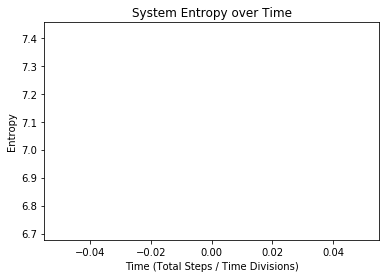

In [32]:
#Diffusion Simulation, 2D Box with Non-Permeable Walls. Calculates the System Entropy and plots over time.
#Liam Plybon, 2019

import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
import random
import collections

N = 20                          #Number of particles occupying a grid square
L = 8                           #Length of square side
steps = 10000000                #Number of time steps
Axis = 100                      #Side length of plot
times = 1                     #Number of timesteps to plot
particleplots = 2               #Plots the diffusion if greater than 1.

lim = Axis / 2

offset = L / 2

x = []
y = []
entropy = []


#Initializes a cube of particles.
for n in range(N):
    for i in range(L):
        for j in range(L):
            x.append(i-offset)
            y.append(j-offset)
            
#Runs the motion of the particles.
for t in range(times):
    for i in range(int(steps / times)):
        h = random.random()
        q = random.random()
        p = random.randrange(1, len(x), 1)
        if h > .5:
            if q > .5:
                x[p-1] = x[p-1] + 1
                if x[p-1] > lim:
                    x[p-1] = x[p-1] - 1
            if q < .5:
                x[p-1] = x[p-1] - 1
                if x[p-1] < -1 * lim:
                    x[p-1] = x[p-1] + 1
        if h < .5:
            if q > .5:
                y[p-1] = y[p-1] + 1
                if y[p-1] > lim:
                    y[p-1] = y[p-1] - 1
            if q < .5:
                y[p-1] = y[p-1] - 1
                if y[p-1] < -1 * lim:
                    y[p-1] = y[p-1] + 1


    #Plots the particles after they move about.
    if particleplots > 1:
        plt.scatter(x, y)
        plt.title("Diffusion of " + str(N*L*L) + " particles after " + str(steps) + " time steps")
        plt.xlim(-1 * lim, lim)
        plt.ylim(-1 * lim, lim)
        plt.savefig("diffusion" + str(t) + ".png")
        plt.close()

    #Calculating total entropy.
    coords = list(zip(x, y))                   #zips up x and y into a single coordinate
    counter = collections.Counter(coords)       #uses a counter to count unique coordinates
    a = counter.values()                        #this array contains the number of times a coordinate is found
    a = [x / ( N * L * L) for x in a]  #this divides the number of found coordinates by the total particles
    s = []
    for i in a:
        s.append(i * math.log(i))           
    S = -1 * sum(s)
    print(S)
    entropy.append(S)

plt.plot([i for i in range(times)], entropy)
plt.title("System Entropy over Time")
plt.ylabel("Entropy")
plt.xlabel("Time (Total Steps / Time Divisions)")
plt.show()

In [28]:
print(-1* math.log(1 / 100**2))

9.210340371976182
